1. **COLETA DE DADOS**



In [ ]:
#importação das bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
#importação dos dados
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

In [ ]:
#leitura da base de dados
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#analise do formato dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#analise descritiva de dados
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


INSIGHTS DA DESCRIÇÃO DOS DADOS


*   25% dos bairros tem uma idade mediana (housing_median_age) menor do que 18
*   50% dos bairros tem idade mediana menor do que 29
*   75% dos bairros tem idade mediana menor que 37





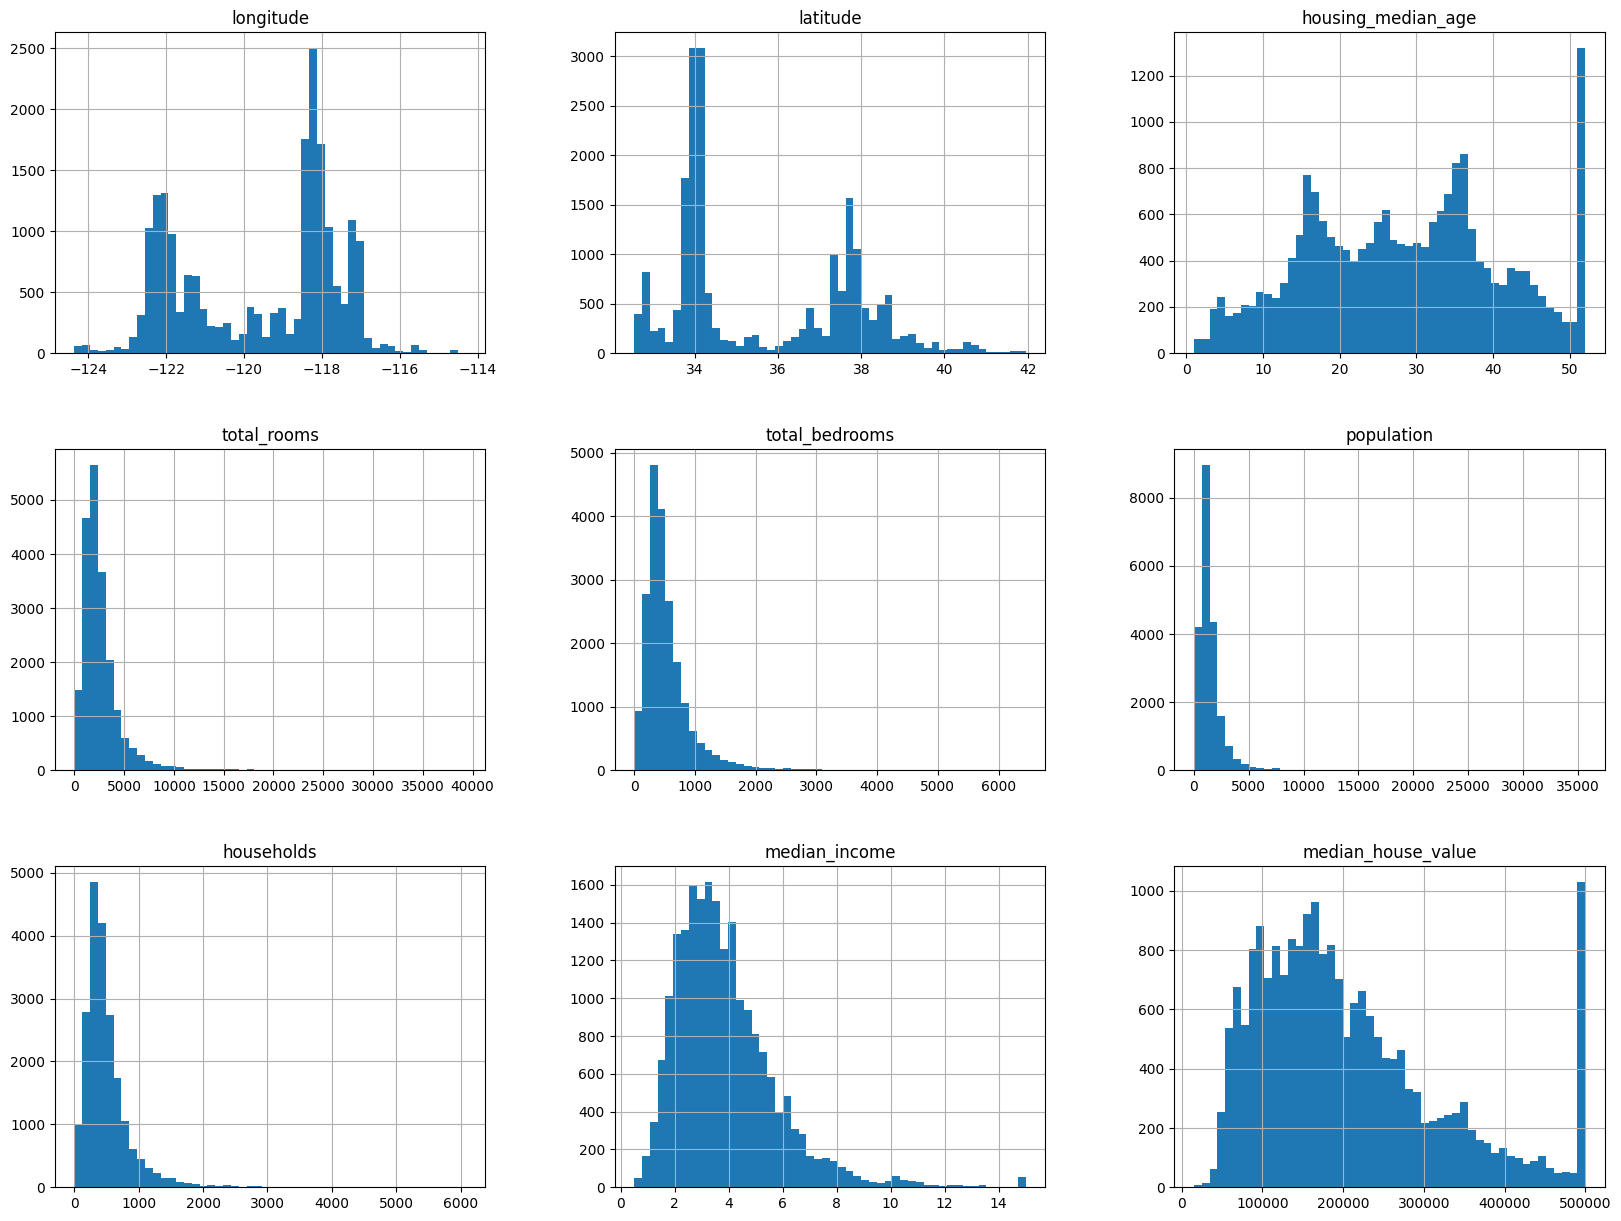

In [ ]:
#analisando as distribuições dos dados
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
#realçando os insights da analise de distribuição

2. **EDA E MODELAGEM DE DADOS**

**CORRELAÇÃO DE PEARSON**

Como o conj de dados não muito grande, pode-se calcular o coeficiente de correlação padrão (pearson) entre cada atributo do dataset.
O coeficiente varia de -1 a 1 e pode ser interpretado a seguir.


*   proximo de 1: forte correlação positiva
*   proximo de -1: forte correlação negativa
*   proximo de 0: não há correlação entre os dados



In [ ]:
#correlação de dados
df_copy = df.copy()

In [ ]:
corr_matrix = df.corr(numeric_only=True)

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


**VISUALIZANDO CORRELAÇÕES DE DADOS**

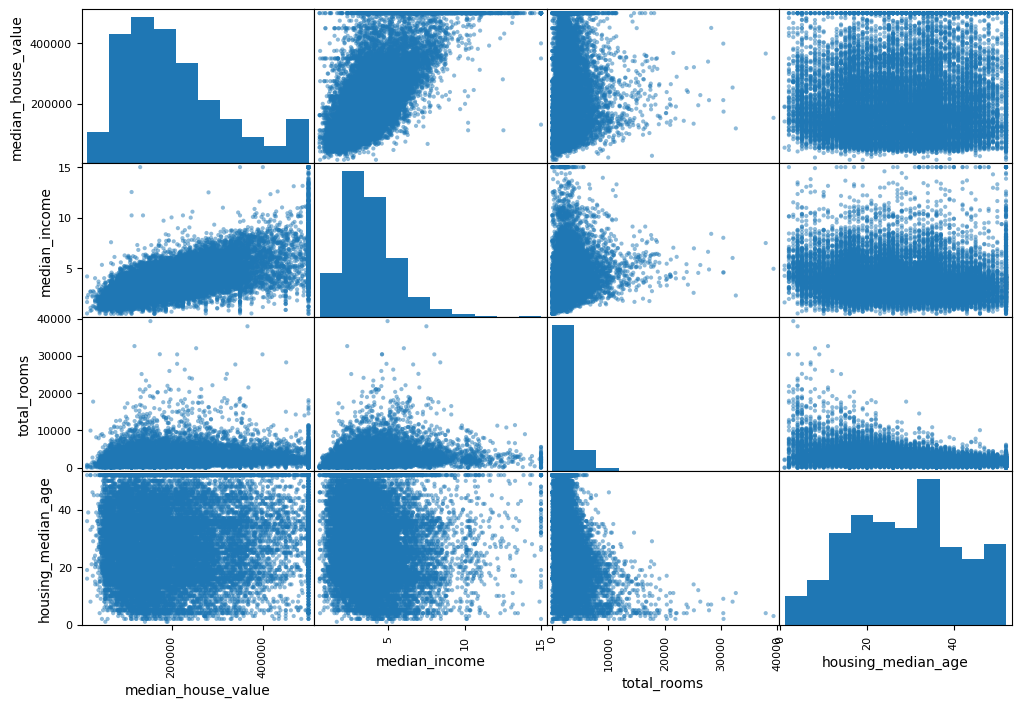

In [ ]:
#visualizando relacionamento entre variaveis numericas
#from pandas.tools.plotting import scatter_matrix # for older versions of pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value",
              "median_income",
              "total_rooms",
              "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8));

**ENGENHARIA DE ATRIBUTOS**

In [ ]:
def feature_engineering(df):
  df["rooms_per_household"] = df["total_rooms"]/df["households"]
  df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
  df["population_per_household"] = df["population"]/df["households"]

In [ ]:
feature_engineering(df)

In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


**LIDANDO COM DADOS NULOS**

In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
#option 1 - delete registros que possuem nulos da coluna total_bedrooms
df.dropna(subset=["total_bedrooms", "bedrooms_per_room"], inplace=True) #option 1

**APLICANDO ONE HOT ENCODING NOS ATRIBUTOS CATEGORICOS**

In [ ]:
#aplicando OHE na coluna ocean_proximity
df = pd.get_dummies(df, columns=["ocean_proximity"], prefix="proximity")

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209,False,True,False,False,False


**DIVIDIR OS DADOS EM TREINO E TESTE**

Quando vc estima o erro de generalização utilizando o conj de teste, sua estimativa será muito otimista e seu sistema pode não funcionar tão bem quanto o esperado assim que colocado em produção. Isso é chamado de data **snooping bias**.

Criar um conj de teste é simples, vc só precisa selecionar parte do conj (20%) voluntariamente e colocar de lado.

Usaremos o metodo StratifiedShuffleSplit que retorna um numero de estratos (folds) randomizados.Cada fold pode presrvar a porcentagem dos samples p cada classe.


In [ ]:
df["income_cat"] = pd.cut(df["median_income"],
                           bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                           labels=[1,2,3,4,5])
df['income_cat'].value_counts()

,count
income_cat,
3,7156
2,6515
4,3611
5,2337
1,814


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['income_cat']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [ ]:
features = ['housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income',
            'rooms_per_household',
            'bedrooms_per_room',
            'population_per_household',
            'proximity_<1H OCEAN',
            'proximity_INLAND',
            'proximity_ISLAND',
            'proximity_NEAR BAY',
            'proximity_NEAR OCEAN']
target = ['median_house_value']

In [ ]:
X_train = strat_train_set[features]
X_test = strat_test_set[features]

y_train = strat_train_set[target]
y_test = strat_test_set[target]

**CRIAÇÃO DE ALGOTIRMO DE REGRESSÃO LINEAR**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**AVALIANDO MSE, MAPE, E RMSE NO CONJ DE TREINO**

In [ ]:
y_train_pred = lin_reg.predict(X_train)
rl_mse_train = mean_squared_error(y_train, y_train_pred)
rl_rmse_train = np.sqrt(rl_mse_train)
rl_mae_train = mean_absolute_error(y_train, y_train_pred)
print(f"Avaliando no conj de treino\nMAE: {rl_mae_train}\nMSE: {rl_mse_train}\nRMSE: {rl_rmse_train}")

Avaliando no conj de treino
MAE: 49930.8596378593
MSE: 4825814645.051563
RMSE: 69468.08364314913


**AVALIANDO MSE, MAPE E RMSE NO CONJ DE TESTE**

In [ ]:
y_test_pred = lin_reg.predict(X_test)
rl_mse_test = mean_squared_error(y_test, y_test_pred)
rl_rmse_test = np.sqrt(rl_mse_test)
rl_mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Avaliando no conj de treino\nMAE: {rl_mae_test}\nMSE: {rl_mse_test}\nRMSE: {rl_rmse_test}")

Avaliando no conj de treino
MAE: 49267.17493678504
MSE: 4593220668.596762
RMSE: 67773.30350954394
